In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from thesispack.methods import history_figure
from thesispack.models import RTT_RNN_AT
from package.thesispack.datasets import WIFIRTTDataset

In [5]:
from package.thesispack.methods import plot_psxy, plot_psxy2
for gpu in tf.config.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
rttwifi_dset = WIFIRTTDataset()

In [15]:
es = {'es_strategy':'patience', 'es_metric':'val_score', 'es_min_delta': 1e-3, 'es_patience': 10 }
rtt_rnn = RTT_RNN_AT(early_stop_vars=None)

In [16]:
# rtt_rnn.load_weights('weights/rtt_rnn16_1_weights')

In [25]:
rtt_rnn.set_lr_rate(1e-5)
es = {'es_strategy':'patience', 'es_metric':'val_score', 'es_min_delta': 1e-3, 'es_patience': 10 }
# rtt_rnn.set_early_stop(es)
rtt_rnn.set_clip_norm(0.0)

rtt_rnn.train(rttwifi_dset.train, 100, rttwifi_dset.val, history_learning_process=True)

Epoch 45 finished
train_cost: 0.004593785386532545, train_score: 28.997278213500977
val_cost: 0.024961121380329132, val_score: 35.877716064453125
Epoch 46 finished
train_cost: 0.004491692874580622, train_score: 28.5933780670166
val_cost: 0.024988986551761627, val_score: 35.888954162597656
Epoch 47 finished
train_cost: 0.00439420435577631, train_score: 28.20667839050293
val_cost: 0.02501322701573372, val_score: 35.89961242675781
Epoch 48 finished
train_cost: 0.004301163367927074, train_score: 27.835960388183594
val_cost: 0.025037042796611786, val_score: 35.909393310546875
Epoch 49 finished
train_cost: 0.004212361294776201, train_score: 27.476470947265625
val_cost: 0.025060489773750305, val_score: 35.91663360595703
Epoch 50 finished
train_cost: 0.00412699906155467, train_score: 27.129302978515625
val_cost: 0.025083301588892937, val_score: 35.922420501708984
Epoch 51 finished
train_cost: 0.004044273402541876, train_score: 26.788618087768555
val_cost: 0.025103529915213585, val_score: 35.92

KeyboardInterrupt: 

In [26]:
print(rtt_rnn.cost_mtr.metric_dataset(rttwifi_dset.val))
print(rtt_rnn.cost_mtr.metric_dataset(rttwifi_dset.train))

print(rtt_rnn.score_mtr.metric_dataset(rttwifi_dset.val))
print(rtt_rnn.score_mtr.metric_dataset(rttwifi_dset.train))

tf.Tensor(0.025609506, shape=(), dtype=float32)
tf.Tensor(0.0025456292, shape=(), dtype=float32)
tf.Tensor(36.144104, shape=(), dtype=float32)
tf.Tensor(20.213972, shape=(), dtype=float32)


In [27]:
print(rtt_rnn.cost_mtr.metric_dataset(rttwifi_dset.test))
print(rtt_rnn.score_mtr.metric_dataset(rttwifi_dset.test))

tf.Tensor(0.025507992, shape=(), dtype=float32)
tf.Tensor(36.279865, shape=(), dtype=float32)


In [28]:
# rtt_rnn.save_weights('weights/rtt_rnn18_1_weights')

(1231, 2)
tf.Tensor(2.031113, shape=(), dtype=float32)
4.0930777


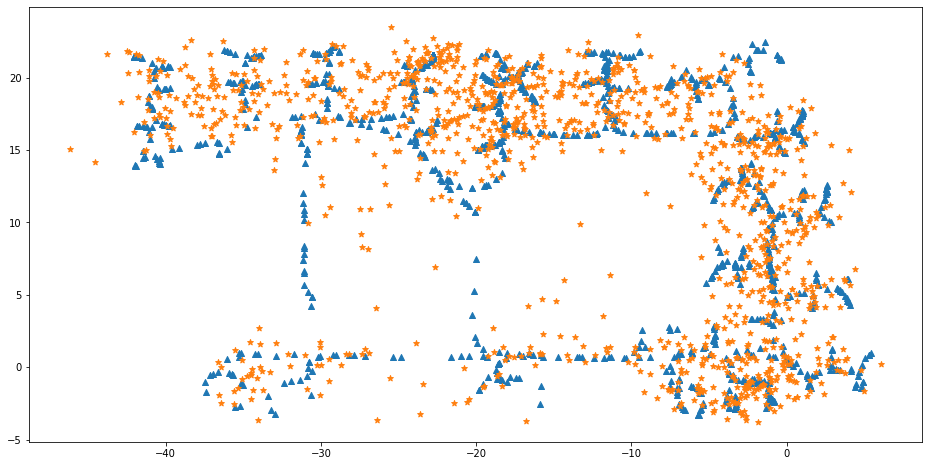

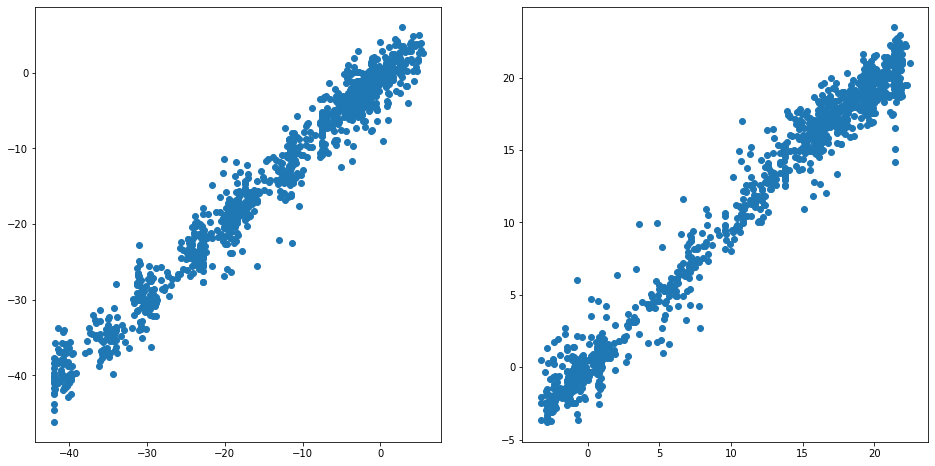

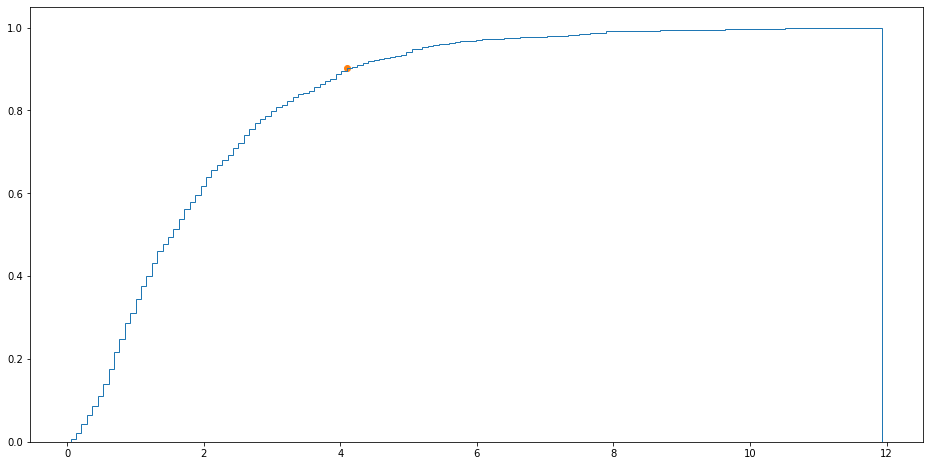

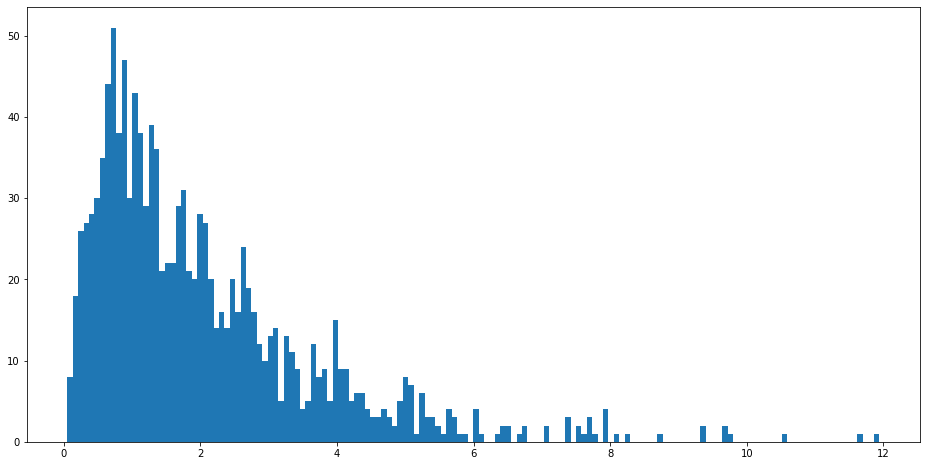

<Figure size 1152x576 with 0 Axes>

In [29]:
#train
save_obj = ['.','outpout','train-top-20']
plot_psxy(rtt_rnn, 'train')
plot_psxy2(rtt_rnn, 'train',  kfirst=-1, save_obj=None)

(616, 2)
tf.Tensor(7.1858444, shape=(), dtype=float32)
13.761483


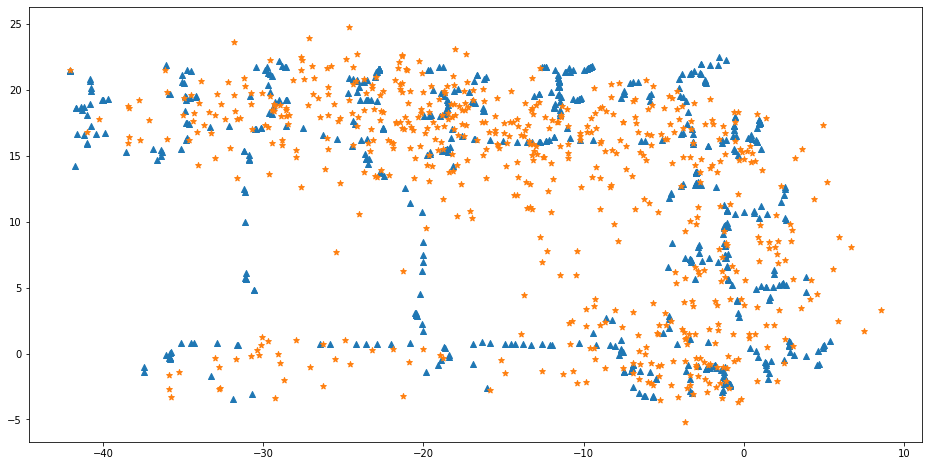

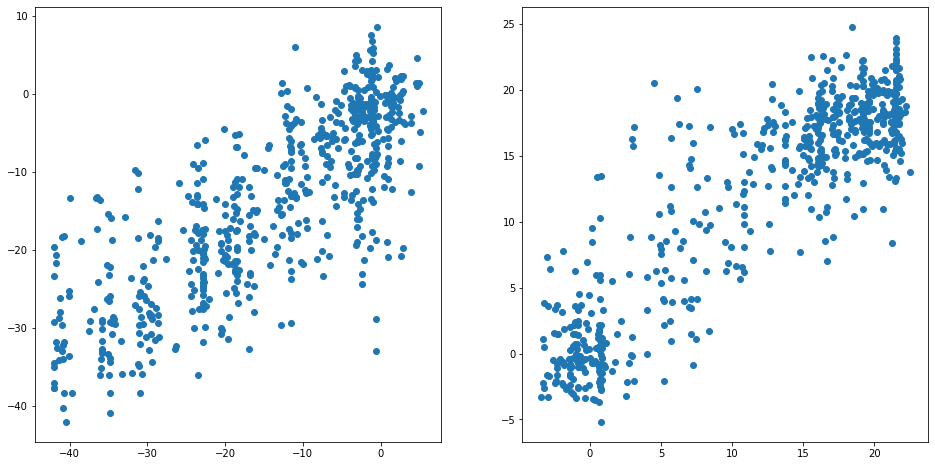

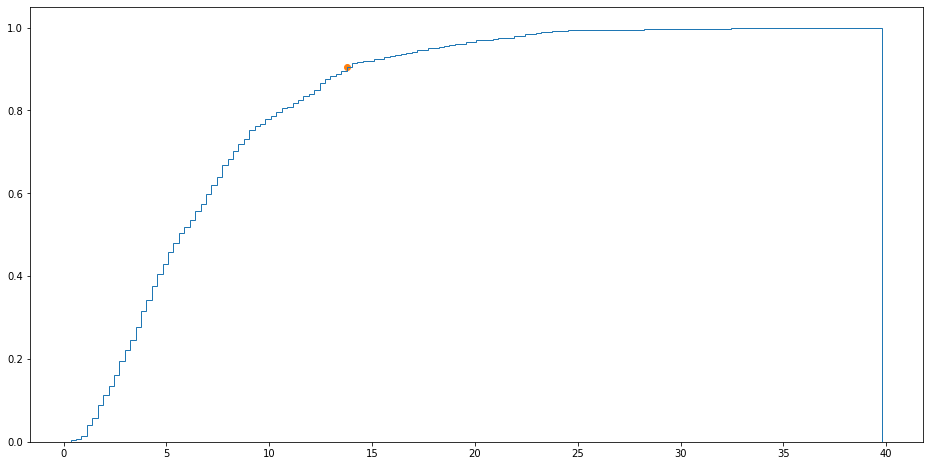

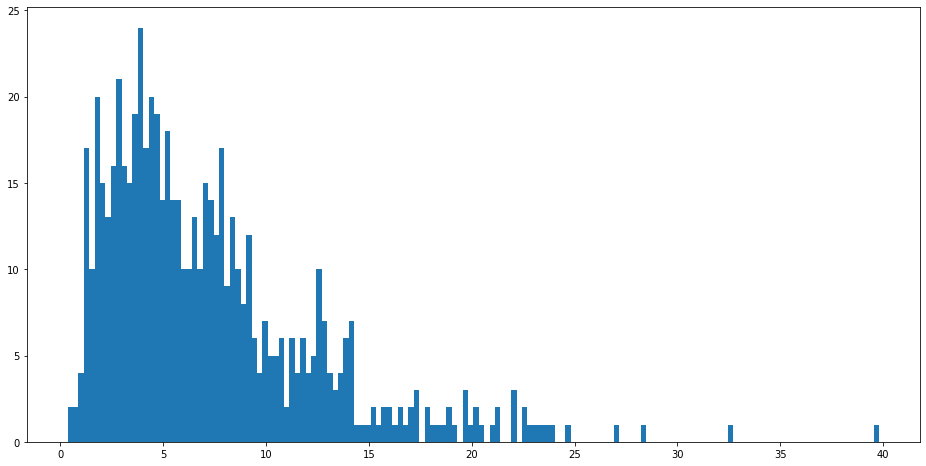

<Figure size 1152x576 with 0 Axes>

In [30]:
#val
save_obj = ['.','outpout','train-top-20']
plot_psxy(rtt_rnn, 'val')
plot_psxy2(rtt_rnn, 'val', kfirst=-1, save_obj=None)

(616, 2)
tf.Tensor(7.1616817, shape=(), dtype=float32)
13.939219


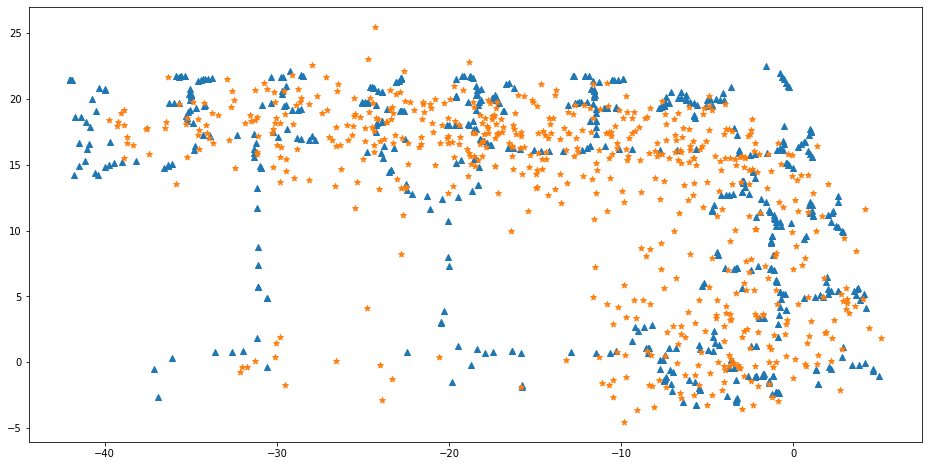

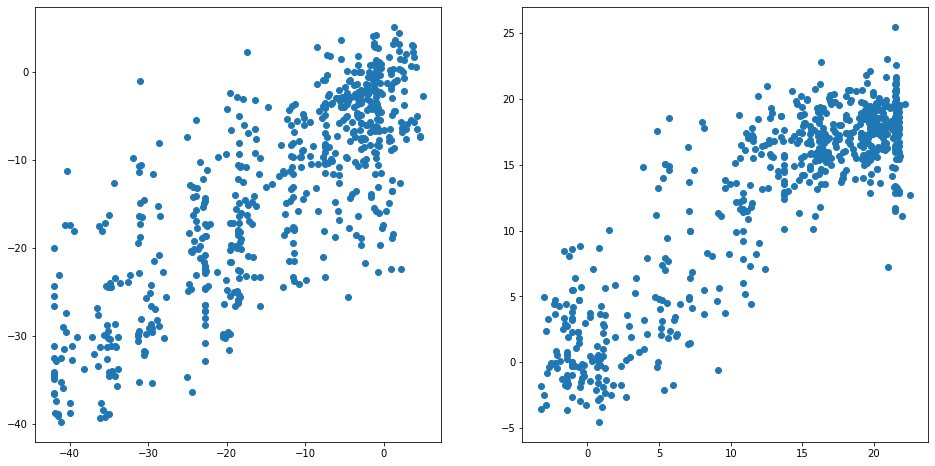

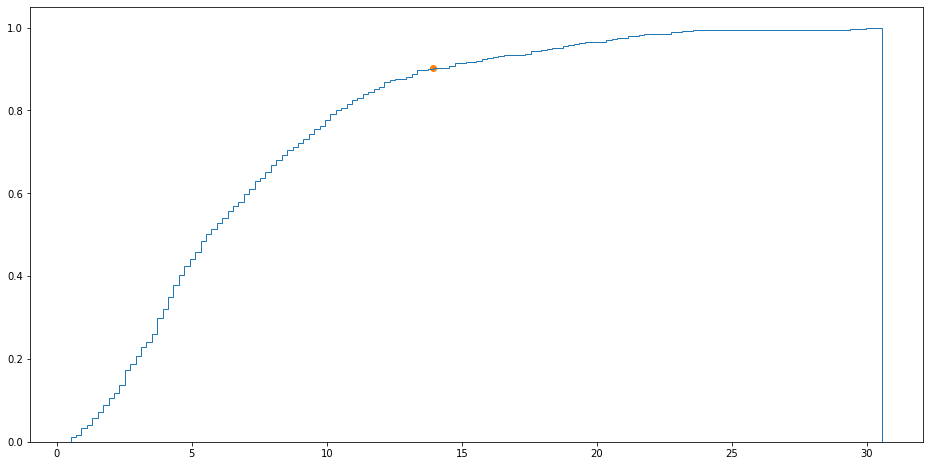

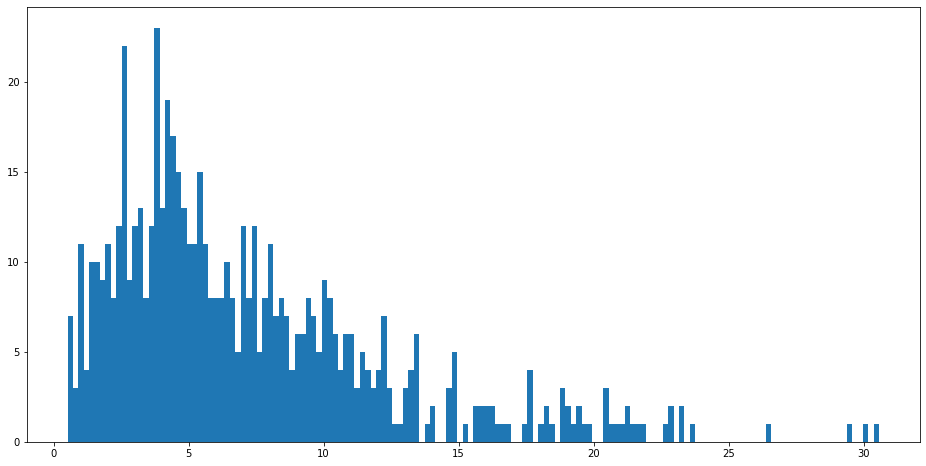

<Figure size 1152x576 with 0 Axes>

In [24]:
#test
save_obj = ['.','outpout','test-top-20']
plot_psxy(rtt_rnn, 'test')
plot_psxy2(rtt_rnn, 'test', kfirst=-1, save_obj=None)

In [ ]:
save_obj = ['.','.','rtt-wifi','cost-score','']
history_figure(rtt_rnn.history, save_obj=None)